In [1]:
#Import libraries
import numpy as np
import cv2
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
def show_image(img):
    cv2.imshow('Image' , img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
#Load Image
img = cv2.imread(r'input_img1.jpg')
show_image(img)

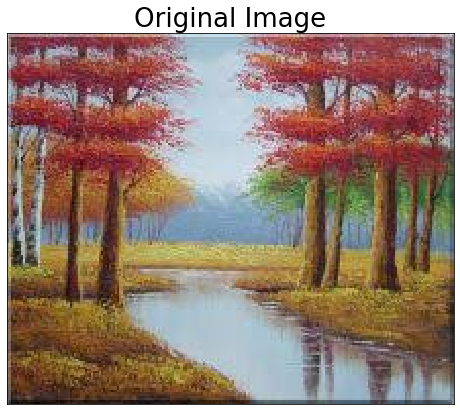

In [4]:
#Display Image
plt.figure(num = 1, figsize=(8,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontsize=26)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [10]:
#STEP 1
#Use median filter to reduce noise
# convert to grayscale and apply median blur
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 3)

In [77]:
#STEP 2
#Use adaptive thresholding to create an edge mask
# detect and enhance edges
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 9)
show_image(edges)

In [78]:
#STEP 3
#Apply bilateral filter to the image
color = cv2.bilateralFilter(img, 5, 50, 50)
show_image(color)

In [79]:
# Step 4
# Combine color image with edge mask & display picture
# convert back to color, bit-AND with color image
cartoon = cv2.bitwise_and(color, color, mask=edges)
show_image(cartoon)

In [82]:
contours, _ = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# for i in range(len(contours)):
#     tmp = contours[i]
#     contours[i] = cv2.approxPolyDP(tmp, 2, False)
show_image(cv2.drawContours(img, contours, -1, 0, thickness=1))
show_image(img)

In [85]:
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
show_image(img1)

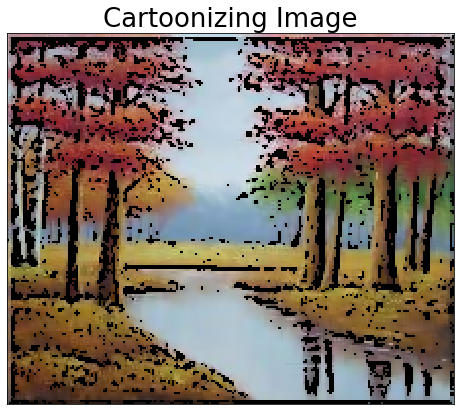

In [65]:
#Display output
plt.figure(num = 1, figsize=(8,8))
plt.imshow(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB))
plt.title('Cartoonizing Image', fontsize=26)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()